In [2]:
## Importing all the necessary packages

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

%matplotlib inline

### Data Read-In

In [3]:
# Create Root Directory
rootDirectory = str(os.path.abspath('..'))
# Change Directory to data/raw
os.chdir("{}/data".format(rootDirectory))
print(os.getcwd())

C:\Users\rtilekar\Desktop\AirBnB_challenge\AirBnbPrediction\data


In [4]:
## Import the training interim file which is an output of the Data processing program
train_raw = pd.read_csv( rootDirectory + "/data/raw/train.csv")
#train_raw = train_raw.iloc[:,1:] # Remove row number column introduced in the data when data is imported from excel

In [5]:
print("There are {} number of rows and {} of columns in the training dataset".format(train_raw.shape[0],train_raw.shape[1]))

There are 74111 number of rows and 29 of columns in the training dataset


In [6]:
## Checking different columns in our dataset
train_raw.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

## Data Distribution for prices of Airbnb

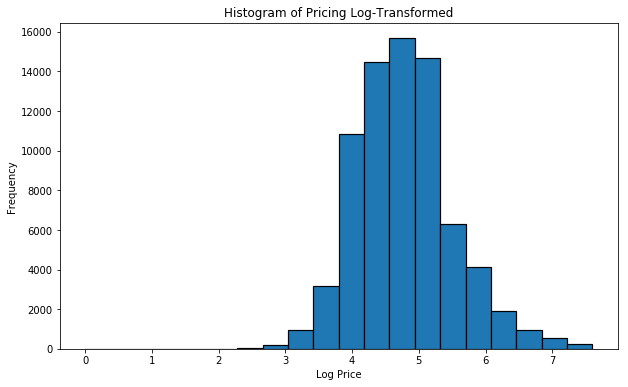

In [7]:
# visualize distribution of price (target variable)
plt.figure(figsize=(10, 6))
plt.hist(train_raw['log_price'], bins=20, edgecolor='black', linewidth=1.2)
plt.title("Histogram of Pricing Log-Transformed")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()

> From the visual above we can see that the data is only a little bit left skewed with less datapoints towards the start range of pricing of airbnb

In [14]:
## Checking the median price for houses with different bedrooms to get hang of the data and price range for different houses
train_raw.groupby(['bathrooms'])[['log_price']].median().sort_values('log_price')

,log_price
bathrooms,
8.0,3.988984
0.0,4.174387
0.5,4.174387
1.0,4.605170
1.5,4.605170
2.0,5.293305
2.5,5.616771
3.0,5.783825
4.0,6.109248


### Correlation Plot

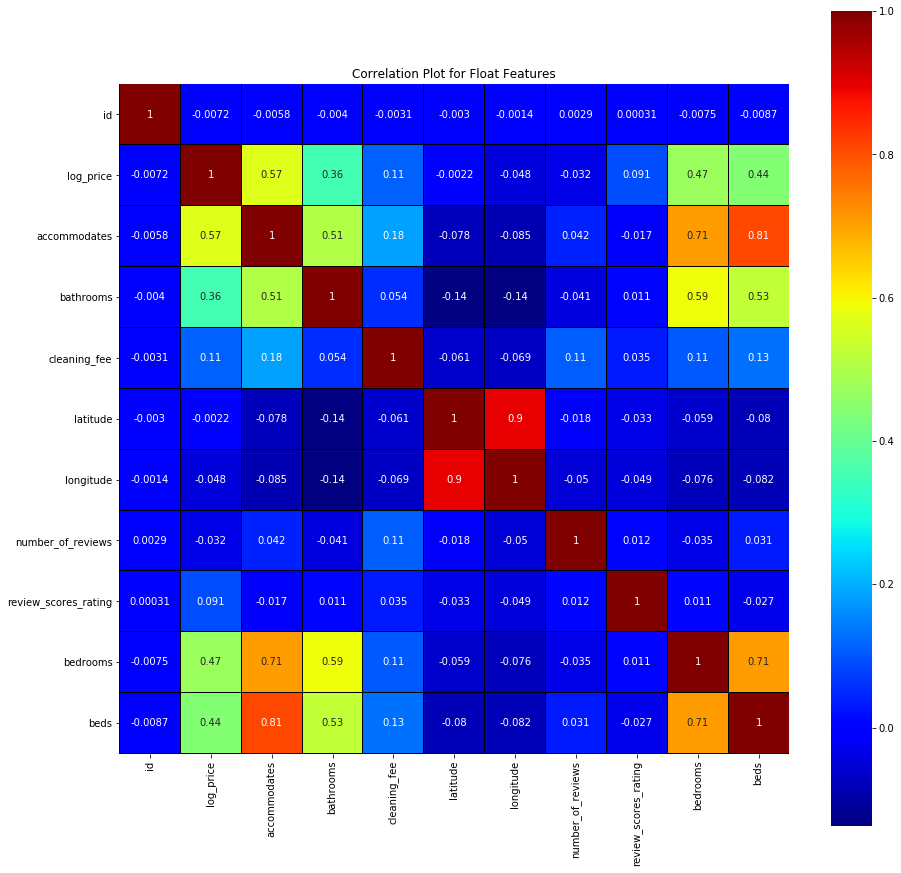

In [13]:
## Correlation plot for all float Features
ax = plt.figure(figsize=(15,15))
ax = sns.heatmap((train_raw).corr(),
                 linewidths=0.01,
                 vmax=1.0, 
                 square=True, 
                 linecolor='black', 
                 cmap=plt.cm.jet, 
                 annot= True)
ax.set_title("Correlation Plot for Float Features")
plt.show()
plt.close()

>  - From the correlation plot above, we can see that Features related to a house such as bathrooms, beds or bedrooms have a positive correlation with the price of the airbnb
>  - Accomodates feature has a high positive correlation with the price
>  - As expected accomodates has a very high correlation with beds feature in our dataset. By these observations we make sure that our dataset is what we have expected and there are no irregularities in the data

### Bucketing features for further analysis

In [9]:
## Seperate the data into target and features dataset
prices = train_raw['log_price']
features = train_raw.drop('log_price', axis = 1)

In [10]:
float_features =  (features.select_dtypes(include=['float64'])).columns
object_features =  (features.select_dtypes(include=['object'])).columns

In [11]:
print("Below are the continuous features in our dataset")
float_features

Below are the continuous features in our dataset


Index(['bathrooms', 'latitude', 'longitude', 'review_scores_rating',
       'bedrooms', 'beds'],
      dtype='object')

In [12]:
## Remove latitude and longitude from the list of flaot features
float_features = float_features.delete([1,2]) 
print("Below is the updated list of continuous features")
float_features

Below is the updated list of continuous features


Index(['bathrooms', 'review_scores_rating', 'bedrooms', 'beds'], dtype='object')

In [13]:
object_features

Index(['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'name',
       'neighbourhood', 'thumbnail_url', 'zipcode'],
      dtype='object')

In [14]:
## Checking cardinality of Categorical feature

for featr in object_features:
    print("Variable {} has {} unique values".format(featr,features[featr].value_counts().shape[0]))

Variable property_type has 35 unique values
Variable room_type has 3 unique values
Variable amenities has 67122 unique values
Variable bed_type has 5 unique values
Variable cancellation_policy has 5 unique values
Variable city has 6 unique values
Variable description has 73479 unique values
Variable first_review has 2554 unique values
Variable host_has_profile_pic has 2 unique values
Variable host_identity_verified has 2 unique values
Variable host_response_rate has 80 unique values
Variable host_since has 3087 unique values
Variable instant_bookable has 2 unique values
Variable last_review has 1371 unique values
Variable name has 73359 unique values
Variable neighbourhood has 619 unique values
Variable thumbnail_url has 65883 unique values
Variable zipcode has 769 unique values


In [15]:
## Remove high cardinal categorical features from our list of features so that we can plot initial exploratory visuals
object_features = object_features.delete([0,2,6,7,10,11,13,14,15,16,17]) 
print("Below is the updated list of continuous features")
object_features

Below is the updated list of continuous features


Index(['room_type', 'bed_type', 'cancellation_policy', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'instant_bookable'],
      dtype='object')

### Distribution of data by different listing related factors

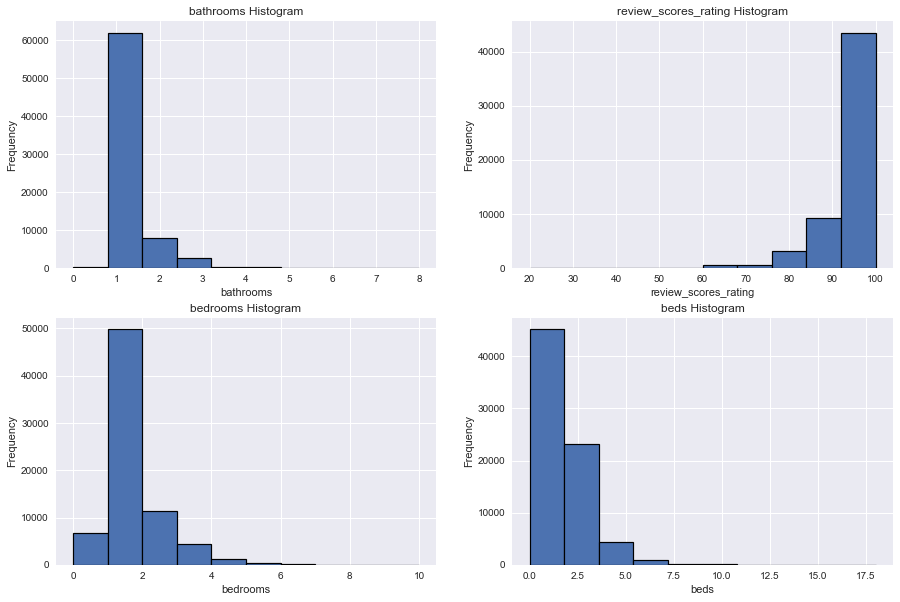

In [16]:
plt.figure(figsize=(15, 10))
for i, ob_fetr in enumerate(float_features):
    plt.subplot(2, 2, i+1)
    plt.hist(train_raw[ob_fetr][~train_raw[ob_fetr].isnull()],edgecolor='black', linewidth=1.2) 
    plt.title("{} Histogram".format(ob_fetr))
    plt.xlabel(ob_fetr)
    plt.ylabel('Frequency')

> Below are our observations from the histograms above - 
    1. Most of the houses on airbnb are 1 - 3 bathroom houses
    2. The number of bathrooms varies between 1 - 4. And very few houses have more than 4 bedrooms.
    3. Most of the listing on airbnb has 1 - 6 beds in the houses. 

### Airbnb price variation by different categorical features

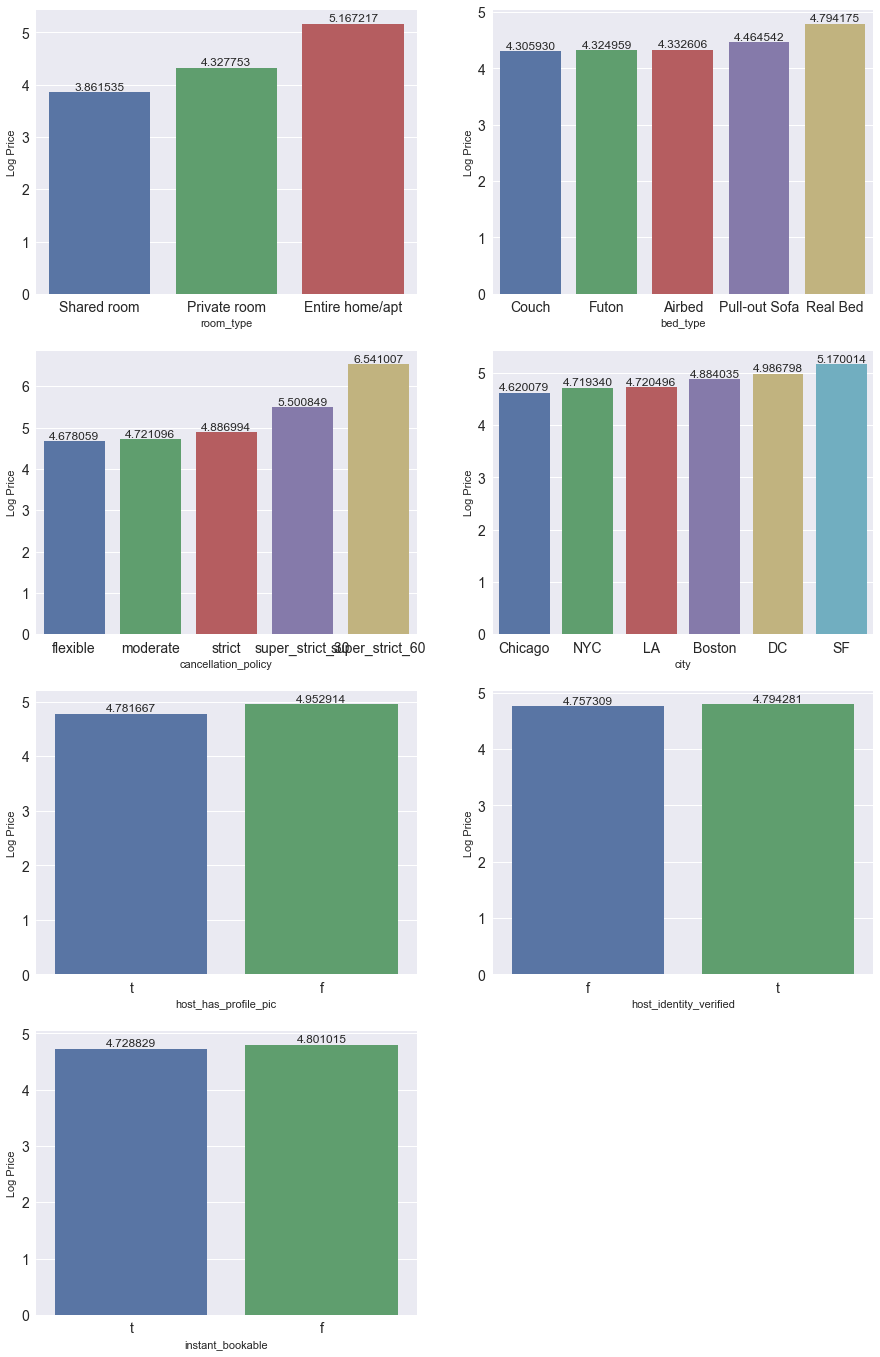

In [17]:
## Let's look into the categorical variables
plt.figure(figsize=(15, 24))
for i,cat_featr in enumerate(object_features):
    plt.subplot(4, 2, i+1)
    temp_data = train_raw[[cat_featr,'log_price']].groupby(cat_featr,as_index = False).mean().sort_values('log_price')
    sns.set(style="darkgrid")
    ax = sns.barplot(x=cat_featr,y='log_price',data=temp_data)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1f}'.format((height)),
                ha="center",va="bottom") 
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.ylabel("Log Price")
    #plt.show()
    #plt.close()

> Looking at the visuals above we can see the the prices for airbnb are almost similar in these case - 
    1. Host has a profile pic or not
    2. If the property is instant bookable or not
    3. Whether the host identity is verified or no
<br>
> From these exploratory visuals we can confirm couple of obvious facts about the price of an airbnb
    1. Entire home/apt costs a lot more than a shared / private room in an house
    2. Having any other type bed other than a real bed decreases the price for an airbnb
    3. Airbnb listings with super strict cancellation policies have higher prices compared to other ones
    4. As SF is one of the most expensive real estate market in USA, the average price of an Airbnb is more around SF areas 